Enter the starting X coordinate (0-7): 3
Enter the starting Y coordinate (0-7): 2
20	63	16	53	26	43	14	55	
17	2	19	44	15	54	27	42	
64	21	62	25	52	45	56	13	
3	18	1	60	57	34	41	28	
22	61	24	51	46	59	12	35	
7	4	47	58	33	38	29	40	
48	23	6	9	50	31	36	11	
5	8	49	32	37	10	39	30	
[[3, 2], [1, 1], [3, 0], [5, 1], [7, 0], [6, 2], [5, 0], [7, 1], [6, 3], [7, 5], [6, 7], [4, 6], [2, 7], [0, 6], [1, 4], [0, 2], [1, 0], [3, 1], [1, 2], [0, 0], [2, 1], [4, 0], [6, 1], [4, 2], [2, 3], [0, 4], [1, 6], [3, 7], [5, 6], [7, 7], [6, 5], [7, 3], [5, 4], [3, 5], [4, 7], [6, 6], [7, 4], [5, 5], [7, 6], [5, 7], [3, 6], [1, 7], [0, 5], [1, 3], [2, 5], [4, 4], [5, 2], [6, 0], [7, 2], [6, 4], [4, 3], [2, 4], [0, 3], [1, 5], [0, 7], [2, 6], [3, 4], [5, 3], [4, 5], [3, 3], [4, 1], [2, 2], [0, 1], [2, 0]]
[[3, 2], [1, 1], [3, 0], [5, 1], [7, 0], [6, 2], [5, 0], [7, 1], [6, 3], [7, 5], [6, 7], [4, 6], [2, 7], [0, 6], [1, 4], [0, 2], [1, 0], [3, 1], [1, 2], [0, 0], [2, 1], [4, 0], [6, 1], [4, 2], [2, 3], [0, 4], [1, 6

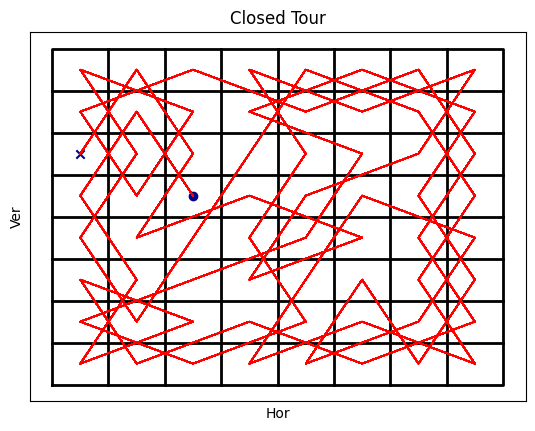

In [4]:
import random
import matplotlib.pyplot as plt

# Representasi posisi kuda pada papan catur
class Cell:
    def __init__(self, x, y):
        self.x = x  # Koordinat x pada papan catur
        self.y = y  # Koordinat y pada papan catur

N = 8  # Ukuran papan catur 8x8

# Array pergerakan kuda dalam catur
cx = [1, 1, 2, 2, -1, -1, -2, -2]
cy = [2, -2, 1, -1, 2, -2, 1, -1]

# Mengecek apakah koordinat berada dalam batas papan catur
def limits(x, y):
    return ((x >= 0 and y >= 0) and (x < N and y < N))

# Mengecek apakah kotak belum dikunjungi
def isempty(a, x, y):
    return (limits(x, y)) and (a[y * N + x] < 0)

# Menghitung jumlah langkah valid dari posisi saat ini
def getDegree(a, x, y):
    count = 0
    for i in range(N):
        if isempty(a, (x + cx[i]), (y + cy[i])):
            count += 1
    return count

# Menentukan langkah berikutnya berdasarkan algoritma Warnsdorff
def nextMove(a, cell):
    min_deg_idx = -1  # Indeks langkah dengan degree minimum
    c = 0
    min_deg = (N + 1)  # Nilai maksimum awal untuk degree
    nx = 0
    ny = 0

    start = random.randint(0, 1000) % N  # Memulai dari langkah acak
    for count in range(0, N):
        i = (start + count) % N  # Iterasi semua kemungkinan langkah
        nx = cell.x + cx[i]
        ny = cell.y + cy[i]
        c = getDegree(a, nx, ny)
        if ((isempty(a, nx, ny)) and c < min_deg):
            min_deg_idx = i
            min_deg = c

    if (min_deg_idx == -1):
        return None  # Tidak ada langkah yang mungkin

    # Perbarui posisi kuda dan matriks langkah
    nx = cell.x + cx[min_deg_idx]
    ny = cell.y + cy[min_deg_idx]
    a[ny * N + nx] = a[(cell.y) * N + (cell.x)] + 1
    cell.x = nx
    cell.y = ny

    return cell

arr = []  # Menyimpan urutan langkah untuk visualisasi

def printA(a):
    for i in range(N):
        for j in range(N):
            print("%d\t" % a[j * N + i], end="")  # Cetak urutan langkah
            arr.append(a[j * N + i])
        print()

# Mengecek apakah langkah terakhir dapat kembali ke awal (closed tour)
def neighbour(x, y, xx, yy):
    for i in range(N):
        if ((x + cx[i]) == xx) and ((y + cy[i]) == yy):
            return True
    return False

# Mencari solusi closed tour
def findClosedTour(start_x, start_y):
    a = [-1] * N * N  # Matriks untuk menandai langkah, -1 = belum dikunjungi
    cell = Cell(start_x, start_y)  # Inisialisasi posisi awal kuda
    a[cell.y * N + cell.x] = 1  # Tandai langkah pertama

    ret = None
    for i in range(N * N - 1):
        ret = nextMove(a, cell)  # Cari langkah berikutnya
        if ret is None:
            return False  # Tidak ada solusi

    if ret is not None and not neighbour(ret.x, ret.y, start_x, start_y):
        return False  # Tidak memenuhi closed tour
    printA(a)  # Cetak matriks langkah
    return True

# Input titik awal dari pengguna
start_x = int(input("Enter the starting X coordinate (0-7): "))
start_y = int(input("Enter the starting Y coordinate (0-7): "))

if 0 <= start_x < N and 0 <= start_y < N:
    while not findClosedTour(start_x, start_y):
        pass  # Ulangi hingga solusi ditemukan
else:
    print("Invalid starting point. Coordinates must be in the range 0-7.")

tour = []

# Menyusun urutan langkah untuk visualisasi
for i in range(1, 65):
    index = arr.index(i)
    tour.append([index//8, index%8])

print(tour)

# Visualisasi menggunakan matplotlib
lx = list()
ly = list()
print(tour)
for i in tour:
    lx.append(0 + i[1] + 0.5)  # Koordinat x untuk visualisasi
    ly.append(8 - (i[0] + 0.5))  # Koordinat y untuk visualisasi

y = [0, 8, 8, 0, 0]
x = [0, 0, 8, 8, 0]
plt.plot(x, y, linewidth=2, color='black')  # Gambar batas papan catur

# Gambar grid papan catur
for i in range (1, 8):
    hx = [i, i]
    hy = [0, 8]
    plt.plot(hx, hy, linewidth=2, color='black')
    plt.plot(hy, hx, linewidth=2, color='black')

# Tandai posisi awal dan akhir
plt.scatter(lx[0], ly[0], color="darkblue", marker='o')
plt.scatter(lx[63], ly[63], color="darkblue", marker='x')

# Gambar jalur perjalanan
for i in lx:
    plt.plot(lx, ly, linewidth=1, color='red')

plt.xlabel('Hor')
plt.ylabel('Ver')

plt.xticks([])
plt.yticks([])

plt.title('Closed Tour')
plt.show()

Masukkan koordinat x starting point (0-7): 5
Masukkan koordinat y starting point (0-7): 4

Knight's Tour Open:
[21, 18, 7, 16, 31, 56, 5, 62]
[8, 15, 20, 45, 6, 61, 30, 57]
[19, 22, 17, 32, 55, 46, 63, 4]
[14, 9, 44, 49, 60, 33, 58, 29]
[23, 42, 13, 54, 47, 50, 3, 34]
[10, 39, 48, 43, 0, 59, 28, 51]
[41, 24, 37, 12, 53, 26, 35, 2]
[38, 11, 40, 25, 36, 1, 52, 27]
[21, 18, 7, 16, 31, 56, 5, 62, 8, 15, 20, 45, 6, 61, 30, 57, 19, 22, 17, 32, 55, 46, 63, 4, 14, 9, 44, 49, 60, 33, 58, 29, 23, 42, 13, 54, 47, 50, 3, 34, 10, 39, 48, 43, 0, 59, 28, 51, 41, 24, 37, 12, 53, 26, 35, 2, 38, 11, 40, 25, 36, 1, 52, 27]
[[5, 4], [7, 5], [6, 7], [4, 6], [2, 7], [0, 6], [1, 4], [0, 2], [1, 0], [3, 1], [5, 0], [7, 1], [6, 3], [4, 2], [3, 0], [1, 1], [0, 3], [2, 2], [0, 1], [2, 0], [1, 2], [0, 0], [2, 1], [4, 0], [6, 1], [7, 3], [6, 5], [7, 7], [5, 6], [3, 7], [1, 6], [0, 4], [2, 3], [3, 5], [4, 7], [6, 6], [7, 4], [6, 2], [7, 0], [5, 1], [7, 2], [6, 0], [4, 1], [5, 3], [3, 2], [1, 3], [2, 5], [4, 4], [5,

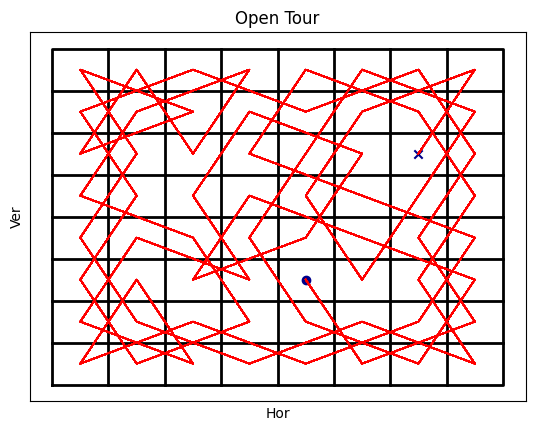

In [5]:
import random
import matplotlib.pyplot as plt

# Mengecek apakah langkah valid (di dalam papan dan belum dikunjungi)
def is_valid_move(x, y, board):
    return 0 <= x < 8 and 0 <= y < 8 and board[x][y] == -1

# Mendapatkan langkah-langkah valid dari posisi saat ini
def get_valid_moves(x, y, board):
    moves = []
    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]

    for i in range(8):
        next_x = x + move_x[i]
        next_y = y + move_y[i]
        if is_valid_move(next_x, next_y, board):
            count = 0
            for j in range(8):
                test_x = next_x + move_x[j]
                test_y = next_y + move_y[j]
                if is_valid_move(test_x, test_y, board):
                    count += 1
            moves.append((next_x, next_y, count))

    # Urutkan langkah berdasarkan aksesibilitas (ascending), kemudian randomize
    moves.sort(key=lambda x: (x[2], random.random()))
    return moves

# Mengecek apakah tur bersifat "closed"
def is_closed_tour(board, start_x, start_y):
    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]

    for i in range(8):
        next_x = start_x + move_x[i]
        next_y = start_y + move_y[i]
        if is_valid_move(next_x, next_y, board) and board[next_x][next_y] == 0:
            return True
    return False

# Algoritma utama untuk mencari "open tour" kuda
def knight_tour(start_x, start_y):
    board = [[-1 for _ in range(8)] for _ in range(8)]
    board[start_x][start_y] = 0

    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]

    if not knight_tour_util(start_x, start_y, 1, board, move_x, move_y):
        return None
    return board

# Fungsi utilitas untuk rekursi
def knight_tour_util(x, y, move_num, board, move_x, move_y):
    if move_num == 64:
        return True

    moves = get_valid_moves(x, y, board)
    for move in moves:
        next_x, next_y, _ = move
        board[next_x][next_y] = move_num
        if knight_tour_util(next_x, next_y, move_num + 1, board, move_x, move_y):
            return True
        board[next_x][next_y] = -1

    return False

arr = []  # Menyimpan langkah untuk visualisasi

def print_board(board):
    for row in board:
        print(row)
    for row in board:
        for i in row:
            arr.append(i)

# Input titik awal dari pengguna
start_x = int(input("Masukkan koordinat x starting point (0-7): "))
start_y = int(input("Masukkan koordinat y starting point (0-7): "))

# Cari dan cetak satu tur "open" berbeda dari starting point
count_open_tours = 0
current_tour = 1

while count_open_tours < 1:
    print(f"\nKnight's Tour Open:")
    current_board = knight_tour(start_x, start_y)
    if current_board is not None and not is_closed_tour(current_board, start_x, start_y):
        print_board(current_board)
        count_open_tours += 1
    else:
        print(f"Tur #{current_tour} tidak bersifat open.")
    current_tour += 1

print(arr)

tour = []

# Menyusun urutan langkah untuk visualisasi
for i in range(0, 64):
    index = arr.index(i)
    tour.append([index//8, index%8])

print(tour)

lx = list()
ly = list()
print(tour)
for i in tour:
    lx.append(0 + i[1] + 0.5)  # Koordinat x untuk visualisasi
    ly.append(8 - (i[0] + 0.5))  # Koordinat y untuk visualisasi

y = [0, 8, 8, 0, 0]
x = [0, 0, 8, 8, 0]
plt.plot(x, y, linewidth=2, color='black')  # Gambar batas papan catur

# Gambar grid papan catur
for i in range (1, 8):
    hx = [i, i]
    hy = [0, 8]
    plt.plot(hx, hy, linewidth=2, color='black')
    plt.plot(hy, hx, linewidth=2, color='black')

# Tandai posisi awal dan akhir
plt.scatter(lx[0], ly[0], color="darkblue", marker='o')
plt.scatter(lx[63], ly[63], color="darkblue", marker='x')

# Gambar jalur perjalanan
for i in lx:
    plt.plot(lx, ly, linewidth=1, color='red')

plt.xlabel('Hor')
plt.ylabel('Ver')

plt.xticks([])
plt.yticks([])

plt.title('Open Tour')
plt.show()

Input Array: [4, 1, 13, 7, 0, 2, 8, 11, 3]
All Longest Increasing Subsequences:
[4, 7, 8, 11]
[1, 7, 8, 11]
[1, 2, 8, 11]
[0, 2, 8, 11]


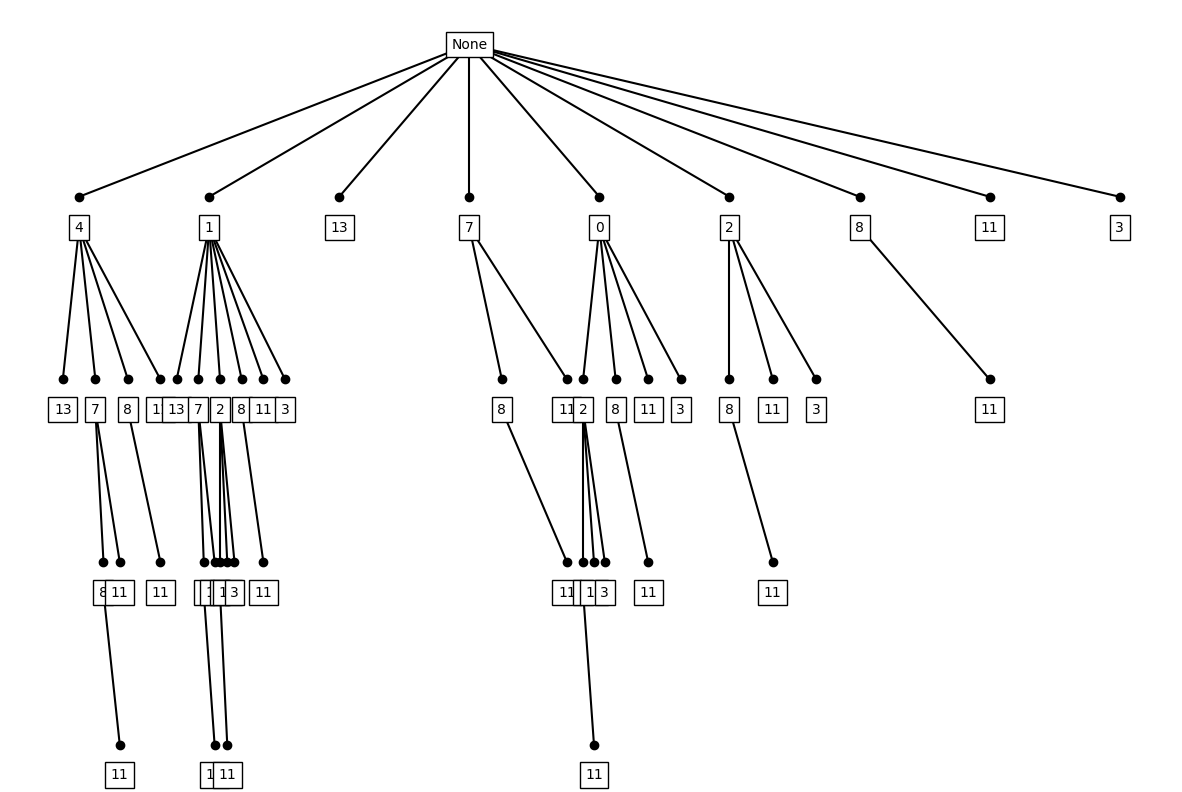

In [6]:
import matplotlib.pyplot as plt

# Kelas TreeNode merepresentasikan sebuah node dalam tree
class TreeNode:
    def __init__(self, value):
        self.value = value  # Nilai elemen node
        self.children = []  # Daftar anak node

# Fungsi untuk membangun tree dari array input
def construct_tree(arr):
    root = TreeNode(None)  # Membuat root dengan nilai None
    construct_tree_helper(root, arr, 0, float('-inf'))  # Memulai tree dari nilai -∞
    return root

# Fungsi rekursif untuk menambahkan anak pada node sesuai aturan LMIS
def construct_tree_helper(node, arr, index, prev_value):
    if index == len(arr):  # Basis rekursi, ketika mencapai akhir array
        return

    # Menambahkan elemen sebagai anak jika elemen lebih besar dari prev_value
    for i in range(index, len(arr)):
        if arr[i] > prev_value:
            child = TreeNode(arr[i])  # Membuat node baru
            node.children.append(child)  # Menambahkan node ke daftar anak
            construct_tree_helper(child, arr, i + 1, arr[i])  # Rekursi untuk elemen berikutnya

# Fungsi untuk menemukan semua jalur terpanjang dari root ke leaf
def find_all_longest_paths(root):
    if not root.children:  # Jika node adalah leaf
        return [[root.value]]  # Mengembalikan jalur berupa nilai node

    all_paths = []  # Daftar semua jalur
    max_length = 0  # Panjang maksimum jalur

    # Iterasi melalui setiap anak node
    for child in root.children:
        child_paths = find_all_longest_paths(child)  # Rekursi pada anak
        for path in child_paths:
            current_path = [root.value] + path  # Membentuk jalur
            if len(current_path) > max_length:  # Jika jalur lebih panjang dari maksimum sebelumnya
                max_length = len(current_path)
                all_paths = [current_path]
            elif len(current_path) == max_length:  # Jika sama panjang, tambahkan ke daftar
                all_paths.append(current_path)

    return all_paths

# Fungsi untuk visualisasi tree menggunakan matplotlib
def plot_tree(root):
    fig, ax = plt.subplots(figsize=(15, 10))  # Membuat figure
    plot_tree_helper(ax, root, 0, 0, 150, 50)  # Memulai visualisasi dari root
    ax.axis('off')  # Menyembunyikan sumbu
    plt.show()

# Fungsi pembantu rekursif untuk menggambar tree
def plot_tree_helper(ax, node, x, y, dx, dy):
    if node is not None:
        # Menampilkan nilai node
        ax.text(x + dx / 2, y + dy / 2, str(node.value), ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

        if node.children:  # Jika node memiliki anak
            next_dx = dx / len(node.children)  # Menentukan jarak horizontal antar anak
            next_x = x
            next_y = y - 3 * dy  # Menentukan posisi vertikal anak
            for child in node.children:
                next_x += next_dx  # Memperbarui posisi x
                ax.plot([x + dx / 2, next_x + next_dx / 2], [y + dy / 2, next_y + dy], color='black', marker='o')  # Menggambar garis
                plot_tree_helper(ax, child, next_x, next_y, next_dx, dy)  # Rekursi untuk anak

# Fungsi utama
def main():
    input_array = [4, 1, 13, 7, 0, 2, 8, 11, 3]  # Array input

    # Membangun tree
    root = construct_tree(input_array)

    # Menemukan semua LMIS
    all_longest_paths = find_all_longest_paths(root)

    # Menampilkan hasil
    print("Input Array:", input_array)
    print("All Longest Increasing Subsequences:")
    for path in all_longest_paths:
        print(path[1:])  # Menghilangkan nilai root None

    # Visualisasi tree
    plot_tree(root)

main()